In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [181]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [184]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [187]:
sales_by_date = df.groupby('Дата')['Количество'].sum().reset_index()



Вывести несколько первых строк сгруппированных данных

In [190]:
print(sales_by_date)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Нарисуйте график продаж у `grouped_df`

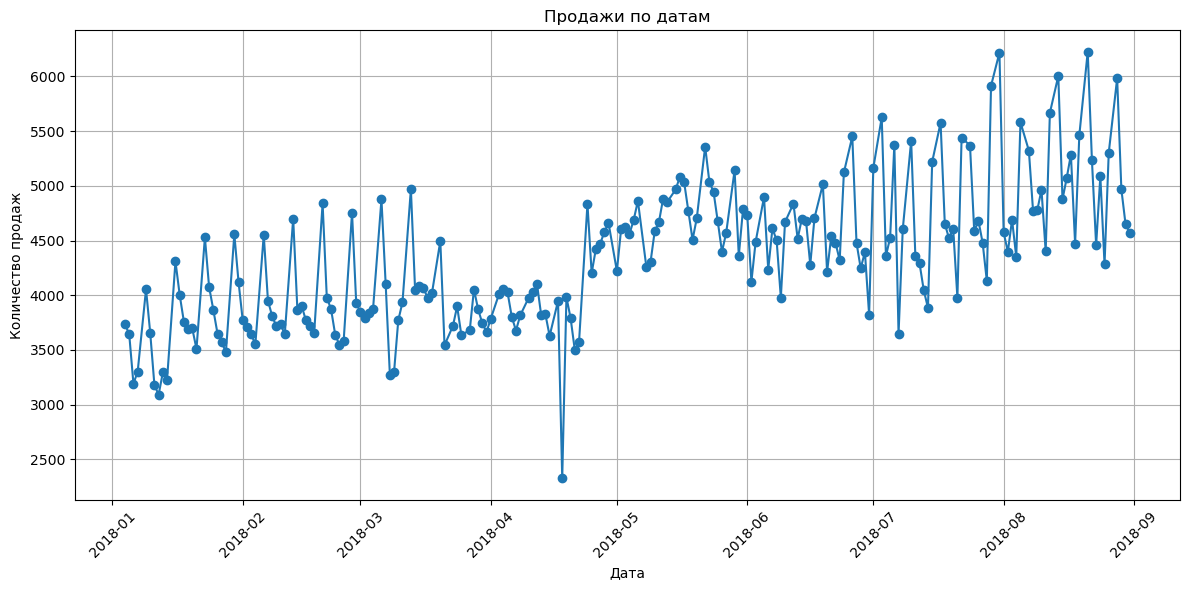

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Дата'],sales_by_date['Количество'], marker='o', linestyle='-')

plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

In [196]:
График отображает устойчивый рост ежедневных продаж с января по сентябрь 2018 года с выраженной сезонной цикличностью, 
регулярными колебаниями, редкими аномальными спадами и явным восходящим трендом.

SyntaxError: invalid syntax (1367221203.py, line 1)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [199]:
import pandas as pd

Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier_row)


Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [202]:
import pandas as pd

df['Дата'] = pd.to_datetime(df['Дата'])

filtered = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2) &  # среда
    (df['Склад'] == 3)
]


top_product = (
    filtered
    .groupby('Номенклатура')['Количество']
    .sum()
    .sort_values(ascending=False)
    .idxmax()  # Название товара с максимальными продажами
)

print("Топовый товар по продажам по средам летом на складе 3:", top_product)


Топовый товар по продажам по средам летом на складе 3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [170]:
df2[['Местное время в Астане']].head(5),

(                  Местное время в Астане
 30.04.2018 23:00                     8.0
 30.04.2018 20:00                    13.4
 30.04.2018 17:00                    16.0
 30.04.2018 14:00                    16.5
 30.04.2018 11:00                    10.9,)

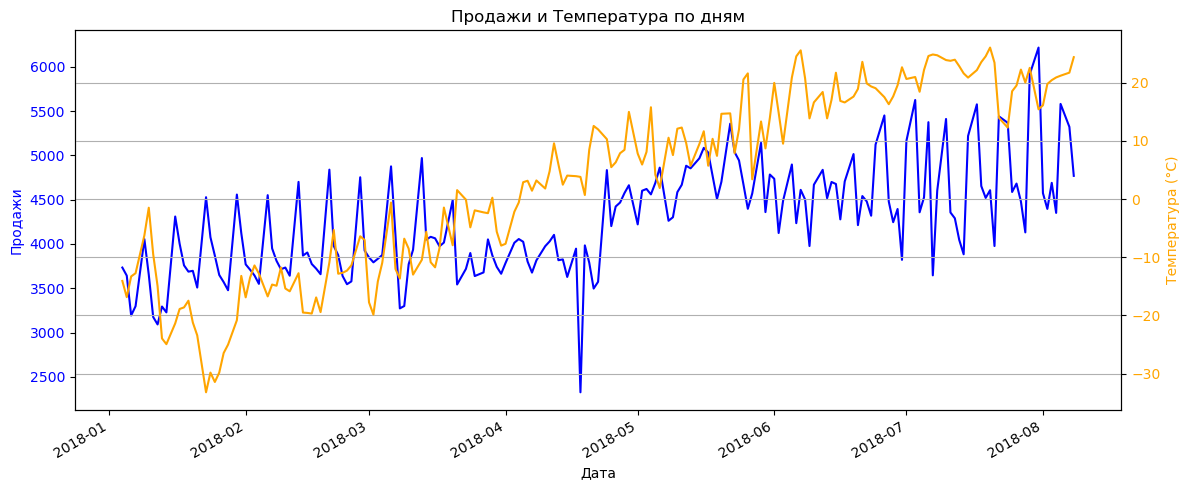

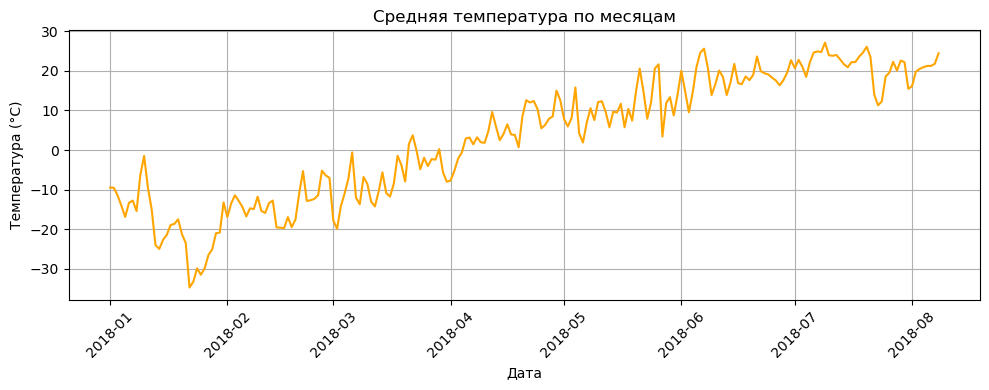

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Загрузка и подготовка погодных данных
df_weather = pd.read_csv('final_weather.csv.gz', sep=';', encoding='windows-1251', skiprows=6, index_col=False)
df_weather['Дата'] = pd.to_datetime(df_weather['Местное время в Астане'], format='%d.%m.%Y %H:%M', errors='coerce')
df_weather['Дата'] = df_weather['Дата'].dt.date
df_weather['Температура'] = pd.to_numeric(df_weather['T'], errors='coerce')
df_weather = df_weather.dropna(subset=['Дата', 'Температура'])

# Группировка по дате
df_temp = df_weather.groupby('Дата')['Температура'].mean().reset_index()
df_temp.columns = ['Дата', 'T']

# Подготовка данных по продажам
sales_by_date['Дата'] = pd.to_datetime(sales_by_date['Дата']).dt.date

# Объединение данных
df_merged = pd.merge(sales_by_date, df_temp, on='Дата', how='inner')

# Преобразуем обратно в datetime для графиков
df_merged['Дата'] = pd.to_datetime(df_merged['Дата'])
df_temp['Дата'] = pd.to_datetime(df_temp['Дата'])

# График: Продажи и Температура с двумя осями Y
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(df_merged['Дата'], df_merged['Количество'], label='Продажи', color='blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Продажи', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Вторая ось для температуры
ax2 = ax1.twinx()
ax2.plot(df_merged['Дата'], df_merged['T'], label='Температура (°C)', color='orange')
ax2.set_ylabel('Температура (°C)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Продажи и Температура по дням')
fig.autofmt_xdate()
fig.tight_layout()
plt.grid(True)
plt.show()

# График температуры отдельно
plt.figure(figsize=(10, 4))
plt.plot(df_temp['Дата'], df_temp['T'], color='orange')
plt.title('Средняя температура по месяцам')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [225]:
print(sales_by_date['Дата'].min(), sales_by_date['Дата'].max())
print(df_temp['Дата'].min(), df_temp['Дата'].max())

2018-01-04 2018-08-31
2018-01-01 00:00:00 2018-08-08 00:00:00
